<a id="CGAN"><h1>Import Header</h1></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/PhD/Development/code/Current/EVAGAN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PhD/Development/code/Current/EVAGAN


In [2]:
!pip install smote_variants

In [3]:
import importlib
import header

importlib.reload(header) # For reloading after making changes
from header import *

<a id="CGAN"><h1>Select GAN and Dataset and Flags</h1></a>

In [4]:
# GAN_type = 'GAN'
# GAN_type = 'CGAN'
# GAN_type = 'WGAN'
# GAN_type = 'WCGAN'
# GAN_type = 'EVAGAN'
# GAN_type = 'ACGAN_CV'
GAN_type = 'EVAGAN_CV'


DATA_SET = 'ISCX-2014'
# DATA_SET = 'CIC-2017'
# DATA_SET = 'CIC-2018'
# DATA_SET = 'UNSW_BotIoT'


# DATA_SET = 'Drebin'

# DATA_SET = 'Darknet'

<a id="GPU Settings"><h2>Set Flags</h2></a>

In [5]:
begin_from_start = 0
take_chunk = 0
required_epochs = 150

DISPLAY_FEATURES = 0
EVALUATION_PARAMETER = 'Accuracy'
SAVE_ONLY_BOT_DATA = 0
USE_KMEANS_FOR_CLASSIFICATION = 1

BALANCE_THE_DATASET = 1

labels =[]

USE_ONLY_TRAIN_SET = 1

USE_ALL_CLASSIFIERS = 0

ACCU_EVAL_TEST = 0
RCL_EVAL_TEST = 0

VISUAL_TEST_OVERLAPPING = 1

CSV_ONE_BOT = 0

VIEW_ALL_BOTS = 0

CTU_NERIS = 0

SINGLE_WEIGHT_CLASSIFIER_TEST_C2ST = 0
SINGLE_WEIGHT_CLASSIFIER_TEST_PROPOSED_METHODOLOGY = 0

C2ST_BLACK_BOX_TEST = 0
BOTSHOT_BLACK_BOX_TEST = 0

C2ST_BLACK_BOX_TEST_AFTER_GAN_TRAINING = 0
BOTSHOT_BLACK_BOX_TEST_AFTER_GAN_TRAINING = 0

GENERATE_OTHERS_DATA = 1

<a id="CGAN"><h1>Set Paths</h1></a>

In [6]:
MAIN_CODE_PATH = os.getcwd()

In [7]:
DATA_SET_PATH = MAIN_CODE_PATH + '/Dataset/' +  DATA_SET + '/'
CACHE_PATH = MAIN_CODE_PATH + '/cache/' + GAN_type + '/'
FIGS_PATH = MAIN_CODE_PATH  + '/figs/' + GAN_type + '/'

In [8]:
print(DATA_SET_PATH)
print(CACHE_PATH)
print(FIGS_PATH)

/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/Dataset/ISCX-2014/
/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/cache/EVAGAN_CV/
/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/figs/EVAGAN_CV/


<a id="GPU Settings"><h2>Check Available GPUs</h2></a>

In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


<a id="GPU Settings"><h2>Import Dataset</h2></a>

In [10]:
%cd $DATA_SET_PATH
!ls

/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/Dataset/ISCX-2014
 __AUG_DATA_SET.csv
 best_losses.csv
 CGAN_0contour.eps
 CGAN_10contour.eps
 CGAN_2contour.eps
 CGAN_4contour.eps
 CGAN_6contour.eps
 CGAN_8contour.eps
 CGAN_data_frame_of_bots_0.csv
 CGAN_data_frame_of_bots_10.csv
 CGAN_data_frame_of_bots_2.csv
 CGAN_data_frame_of_bots_4.csv
 CGAN_data_frame_of_bots_6.csv
 CGAN_data_frame_of_bots_8.csv
 GAN_0contour.eps
 GAN_10contour.eps
 GAN_2contour.eps
 GAN_4contour.eps
 GAN_6contour.eps
 GAN_8contour.eps
 GAN_data_frame_of_bots_0.csv
 GAN_data_frame_of_bots_10.csv
 GAN_data_frame_of_bots_2.csv
 GAN_data_frame_of_bots_4.csv
 GAN_data_frame_of_bots_6.csv
 GAN_data_frame_of_bots_8.csv
 Husnain_GAN_AUG_DATA_SET.csv
 ISCX_Botnet-Testing.pcap_Flow.csv
'ISCX_Botnet-Testing.pcap_Flow.csv_(Preprocessed).csv'
'ISCX_Botnet-Testing.pcap_Flow.csv_VIRUT_(Preprocessed).csv'
 ISCX_Botnet-Training.pcap_Flow.csv
'ISCX_Botnet-Training.pcap_Flow.csv_(Preprocessed).csv'
'ISCX_Botnet-Trainin

In [11]:
if begin_from_start:        

    if DATA_SET == 'ISCX-2014':
        training_data = prepare_ISCX_2014_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'ISCX_Botnet-Training.pcap_Flow.csv')
        testing_data = prepare_ISCX_2014_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'ISCX_Botnet-Testing.pcap_Flow.csv') 
    
    elif DATA_SET == 'CIC-2017':
        training_data = prepare_cic_2017_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'CIC_Friday_bot.csv')
        testing_data = prepare_cic_2017_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'CIC_Friday_bot.csv')
        
    elif DATA_SET == 'CIC-2018':
        training_data = prepare_cic_2018_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
        testing_data = prepare_cic_2018_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
        
    elif DATA_SET == 'UNSW_BotIoT':
        training_data = prepare_UNSW_IoT(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
        testing_data = prepare_UNSW_IoT(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')
        
    elif DATA_SET == 'Darknet':
        training_data = prepare_DARKNET_2020_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Darknet.csv')
        testing_data = prepare_DARKNET_2020_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Darknet.csv')
        
        

    print('Dataset preprocessed: ' + DATA_SET)
    
else:

    if DATA_SET == 'ISCX-2014':
        INPUT_TRAINING_FILE_NAME = r'ISCX_Botnet-Training.pcap_Flow.csv_VIRUT'
        INPUT_TESTING_FILE_NAME = r'ISCX_Botnet-Testing.pcap_Flow.csv_VIRUT'
        
    elif DATA_SET == 'CIC-2017':
        INPUT_TRAINING_FILE_NAME = r'CIC_Friday_bot.csv'
        INPUT_TESTING_FILE_NAME = r'CIC_Friday_bot.csv'
        
    elif DATA_SET == 'CIC-2018':
        INPUT_TRAINING_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'
        INPUT_TESTING_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'
        
    elif DATA_SET == 'BoT-IoT':
        INPUT_TRAINING_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Training.csv'
        INPUT_TESTING_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv'
        
    elif DATA_SET == 'Drebin':
        INPUT_TRAINING_FILE_NAME = r'Drebin_API_Dataset.csv'
        INPUT_TESTING_FILE_NAME = r'Drebin_API_Dataset.csv'
        
    elif DATA_SET == 'Darknet':
        INPUT_TRAINING_FILE_NAME = r'Darknet.csv'
        INPUT_TESTING_FILE_NAME = r'Darknet.csv'

    training_data = pd.read_csv (INPUT_TRAINING_FILE_NAME + '_(Preprocessed).csv', low_memory=False)
    training_data= training_data.drop(['Unnamed: 0'], axis=1)
    
    testing_data = pd.read_csv (INPUT_TESTING_FILE_NAME + '_(Preprocessed).csv', low_memory=False)
    testing_data= testing_data.drop(['Unnamed: 0'], axis=1) 
    
    print('Dataset Imported: ' + DATA_SET)
    print('Training set: '+ str(training_data.shape))
    print('Testng set: '+ str(training_data.shape))
    


Dataset Imported: ISCX-2014
Training set: (248677, 61)
Testng set: (248677, 61)


In [12]:
training_data = training_data.replace([np.inf, -np.inf], np.nan).dropna(how="any").reset_index(drop=True)
print(training_data.describe())

       Flow Duration  Total Fwd Packet  ...      Idle Min          Label
count  248677.000000     248677.000000  ...  2.486770e+05  248677.000000
mean        0.113036          0.000844  ...  4.141199e-01       0.992971
std         0.252565          0.010604  ...  4.799477e-01       0.083545
min         0.000000          0.000000  ...  0.000000e+00       0.000000
25%         0.000005          0.000067  ...  0.000000e+00       1.000000
50%         0.004006          0.000133  ...  1.000000e-08       1.000000
75%         0.058283          0.000200  ...  9.715268e-01       1.000000
max         1.000000          1.000000  ...  1.000000e+00       1.000000

[8 rows x 61 columns]


<a id="GPU Settings"><h2>Display Features</h2></a>

In [13]:
if DISPLAY_FEATURES: 
    unified_df = training_data.copy()
    X_cols = unified_df.columns[:-1]
    y_cols = unified_df.columns[-1]



    axarr = [[]]*len(X_cols)
    columns = 4
    rows = int( np.ceil( len(X_cols) / columns ) )
    f, fig = plt.subplots( figsize=(columns*2.5, rows*2) )

    f.suptitle('Data Distributions by Feature and Label', size=16)

    for i, col in enumerate(X_cols[:]):
        axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )


        axarr[i].hist( unified_df.loc[ unified_df.Label == 0, col ] , label=['Normal'], color=('#009933'), alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].hist( unified_df.loc[ unified_df.Label == 1, col ] , label=['Real Bot'], color=['#FF0000'], alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].set_xlabel(col, size=12)
    #     axarr[i].set_ylim([0,1])
        axarr[i].tick_params(axis='both', labelsize=10)
        if i == 0: 
            legend = axarr[i].legend()
            legend.get_frame().set_facecolor('white')
        if i%4 != 0 : 
            axarr[i].tick_params(axis='y', left=True, labelleft=True)
        else:
            axarr[i].set_ylabel('Fraction',size=12)

    plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
    # plt.savefig('plots/Engineered_Data_Distributions.png')

    plt.show()
    
# else: 
#     print('Pair Plotting..')
# #     sns.pairplot(training_data, hue="Label")
    
#     sns.pairplot(training_data, vars=['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
#        'Total Length of Fwd Packet', 'Total Length of Bwd Packet'], hue="Label")
    
#     sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])

<a id="GPU Settings"><h2>Select Botnet</h2></a>

In [14]:
bots = training_data.loc[ training_data['Label']==0 ].copy()
normal = training_data.loc[ training_data['Label']==1 ].copy()

print('Normal before chunk: ' + str(normal.shape))    
print('Real Bots before chunk: ' + str(bots.shape)) 

if take_chunk:
    bots = bots[0:512]
    
print('Normal: ' + str(normal.shape))    
print('Real Bots: ' + str(bots.shape)) 

Normal before chunk: (246929, 61)
Real Bots before chunk: (1748, 61)
Normal: (246929, 61)
Real Bots: (1748, 61)


In [15]:
Train = training_data.copy()

In [16]:
bots_count =  pd.DataFrame( [ [np.sum(bots['Label']==i)] for i in np.unique(bots['Label']) ], columns=['count'], index=np.unique(bots['Label']) )

label_cols = [ i for i in bots.columns if 'Label' in i ]
data_cols = [ i for i in bots.columns if i not in label_cols ]

train_no_label = bots[ data_cols ].reset_index(drop=True)

print(bots_count['count'])

0    1748
Name: count, dtype: int64


In [17]:
train_data = bots

<a id="Classification"><h1>Classification</h1></a>

1748
CPU times: user 257 ms, sys: 113 ms, total: 370 ms
Wall time: 262 ms


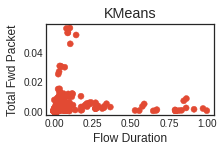

In [18]:
%%time 
# if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
if USE_KMEANS_FOR_CLASSIFICATION:
    algorithms = [ 
    #     [ 'KMeans', cluster.KMeans, (), {'random_state':0} ],
        [ 'KMeans', cluster.KMeans, (), {'n_clusters':1, 'random_state':0} ],
    #     [ 'KMeans 3', cluster.KMeans, (), {'n_clusters':3, 'random_state':0} ],
    #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {} ],
    #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {'linkage': 'ward', 'n_clusters': 3} ],
    #     [ 'Agg. Ave 3', cluster.AgglomerativeClustering, (), {'linkage': 'average', 'n_clusters': 3} ],
    #     [ 'Agg. Complete 3', cluster.AgglomerativeClustering, (), {'linkage': 'complete', 'n_clusters': 3} ],
    #     [ 'DBSCAN', cluster.DBSCAN, (), {'eps':0.025} ],
    #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {} ],
    #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':1, } ],
    #     [ 'HDBSCAN 2 10', hdbscan.HDBSCAN, (), {'min_cluster_size':2, 'min_samples':10, } ],
    #     [ 'HDBSCAN 10 10 ', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':10, } ],
    ]

    rows = len(algorithms)
    columns = 1
    fig, ax = plt.subplots(3, 2, figsize=(3, 2),
                            constrained_layout=True)

    for i, [name, algorithm, args, kwds] in enumerate(algorithms):

        labels = algorithm(*args, **kwds).fit_predict(train_no_label)
        print(len(labels))
        colors = np.clip(labels,-1,9)
        colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

        plt.subplot(rows,columns,i*columns+1)
        plt.scatter(train_no_label[data_cols[0]], train_no_label[data_cols[1]], c=colors)
        plt.xlabel(data_cols[0]), plt.ylabel(data_cols[1])
        plt.title(name)
            

#     else:
#         labels = train_bots_only['Label'].values.tolist() 
#         sns.set(style="ticks", color_codes=True) # Remove background and grid

#     #     g = sns.scatterplot(data_cols[0],data_cols[1], data=train, hue=labels)

#     #     plt.show() 


#         plt.figure()
#         ax = sns.countplot(y="Label", data=train_bots_only) # for Seaborn version 0.7 and more
#         for p in ax.patches:
#             ax.text(p.get_y() + p.get_width() + 2700 , p.get_y()+p.get_height()-0.1, p.get_width(), ha="center") 

#         ax.set_ylabel('Botnets')

#         plt.savefig('Botnet-Trainset.pdf', dpi=600)
#         plt.show()




#         plt.figure(figsize=(6, 6))
#         ax = sns.countplot(y="Label", data=test_bots_only) # for Seaborn version 0.7 and more
#         for p in ax.patches:
#             ax.text(p.get_y() + p.get_width() + 6000 , p.get_y()+p.get_height()-0.1, p.get_width(), ha="center") 

#         ax.set_ylabel('Botnets')

#         plt.savefig('Botnet-Testset.pdf', dpi=600)
#         plt.show()

#     #     g = sns.catplot(x="class", hue="who", col="survived", data=titanic, kind="count", height=4, aspect=.7);


#     #     sns.pairplot(data=train, vars=[data_cols[0], data_cols[1]], hue='Label')


#     # plt.grid(False)
#     # plt.show()
#     print(train_no_label.describe())
    
    botnet_w_classes = train_no_label.copy()
    botnet_w_classes['Label'] = labels

#     print(botnet_w_classes.describe())
    train_data = botnet_w_classes
    
# else:
#     train_data = train_no_label


In [19]:
train_data['Label']

0       0
1       0
2       0
3       0
4       0
       ..
1743    0
1744    0
1745    0
1746    0
1747    0
Name: Label, Length: 1748, dtype: int32

<a id="GPU Settings"><h2>GAN Training</h2></a>

In [ ]:
# import header
# import importlib
# importlib.reload(header) # For reloading after making changes
# from header import *


gpu_device = '/device:GPU:1'
physical_devices = tf.config.list_physical_devices('GPU') 
for gpu_instance in physical_devices: 
    tf.config.experimental.set_memory_growth(gpu_instance, True)

#----------------------------------
# Set neurons and batch size
#----------------------------------
base_n_count = 32
batch_size =  32
#----------------------------------


result = train_data

remaining = train_data.shape[0] % batch_size

if remaining > 0:
    if remaining < train_data.shape[0]:
        additional = batch_size - remaining
        _additional = train_data.loc[train_data.shape[0]-additional:train_data.shape[0],: ]  
        
        frames = [train_data, _additional]
        result = pd.concat(frames).reset_index(drop=True)

print('Result: ' + str(result.shape))
# ---------------------------------
nb_steps = required_epochs * result.shape[0] // batch_size

log_interval = result.shape[0] // batch_size # We are setting this as an epoch. This depends on data size.

print("log_interval : " + str(log_interval))

# nb_steps = TRAINING_ITERATIONS  # 50000 # Add one for logging of the last interval
print("Total Batch Iterations: " + str(nb_steps))
rand_noise_dim = 100 


k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step

critic_pre_train_steps = 100# 100  # number of steps to pre-train the critic before starting adversarial training

generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

show = True 
train = result#.copy().reset_index(drop=True) # botnet only with labels from classification



label_cols = [ i for i in train.columns if 'Label' in i ]

data_cols = [ i for i in train.columns if i not in label_cols ]

print(data_cols)

train_no_label = train[ data_cols ]

train_no_label = round(train_no_label, 4)

# if SAVE_ONLY_BOT_DATA:
#     train_no_label.to_csv(str(DATA_SET_PATH) + 'ONLY_BOTNET_DATA_(Preprocessed).csv')
#     print('File: ' + 'ONLY_BOTNET_DATA_(Preprocessed).csv saved to directory')   



test_size = train.shape[0] 
learning_rate = 5e-4

for X in range(1):

    TODAY = DATA_SET + '_' + str(datetime.datetime.now()) 

    print(TODAY)

    Test = testing_data.copy()

    arguments = [rand_noise_dim, nb_steps, batch_size, 
                k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
                CACHE_PATH, FIGS_PATH, show, test_size, gpu_device, EVALUATION_PARAMETER, TODAY ]

    if GAN_type == 'GAN':
        best_losses = adversarial_training_GAN(arguments, train_no_label, data_cols) # GAN    
    elif GAN_type == 'CGAN':    
        best_losses = adversarial_training_CGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # CGAN      
    elif GAN_type == 'WGAN':
        best_losses = adversarial_training_WGAN(arguments, train_no_label, data_cols) # WGAN    
    elif GAN_type == 'WCGAN':    
        best_losses = adversarial_training_WCGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # WCGAN      
        
        
    # if GAN_type == 'WGAN':
    #     best_losses = train_WGAN(arguments, train_no_label, data_cols)
        
    # elif GAN_type == 'GAN':
    #     best_losses = train_GAN(arguments, train_no_label, data_cols)


    elif GAN_type == 'EVAGAN':   

        best_losses = train_EVAGAN(arguments, train, Train, Test, data_cols)

    elif GAN_type == 'EVAGAN_CV':   

        best_losses = train_EVAGAN_CV(arguments, train, Train, Test, data_cols)
        
        
        
    elif GAN_type == 'ACGAN_CC':   

        best_losses = train_ACGAN_CC(arguments, train, Train, Test, data_cols)
        
    elif GAN_type == 'ACGAN_CV':   

        best_losses = train_ACGAN_CV(arguments, train, Train, Test, data_cols)
        



Result: (1760, 61)
log_interval : 55
Total Batch Iterations: 8250
['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Bwd By

In [ ]:
# %cd '/home/riz/Insync/rhr407@gmail.com/Google_Drive/PhD/Development/code/Current/Paper_2(v7)/figs/full/GAN/'
# !ls

<a id="Columns"><h1>Columns</h1></a>

In [ ]:
X_cols = training_data.columns[:-1]
y_cols = training_data.columns[-1]

print('X_cols: ' + str(X_cols))
print('y_cols: ' + str(y_cols))

X = training_data[X_cols].values
Y = training_data['Label'].values


<a id="Run all Classifiers"><h1>Split Datasets for Testing)</h1></a>

In [ ]:
if USE_ONLY_TRAIN_SET:

    X = training_data[X_cols].values
    Y = training_data['Label'].values

    # split data into train and test sets
    seed = 1
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=11)

    split_70_30 = True

    print('Using Train set 70:30 split >>>>>>>')

else:

    X_train = training_data[X_cols].values
    y_train = training_data[y_cols].values

    X_test = testing_data[X_cols].values
    y_test = testing_data[y_cols].values

    print('Using Test Set for testing >>>>>>>') 

    split_70_30 = False
    
TRAIN_TRAFFIC = pd.DataFrame(X_train) 
TRAIN_TRAFFIC['Label'] = y_train

BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

print('bot samples: ' + str(BOT_COUNTS))  
print('benign samples: ' + str(BENIGN_COUNTS))

TRAIN_TRAFFIC.columns = training_data.columns
#============================================== REAL BOTS =================================================================================================
REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
# REAL_BOTS_WITHOUT_LABEL = REAL_BOTS[REAL_BOTS.columns[:-1]]

print(REAL_BOTS.shape)

<a id="Case7: Select Test Set"><h2>Weights for Testing of each Classifier</h2></a>

In [ ]:
XGB_ACC_WEIGHT = best_losses[0]
XGB_RCL_WEIGHT = best_losses[1]

DT_ACC_WEIGHT = best_losses[2]
DT_RCL_WEIGHT = best_losses[3]

NB_ACC_WEIGHT = best_losses[4]
NB_RCL_WEIGHT = best_losses[5]

RF_ACC_WEIGHT = best_losses[6]
RF_RCL_WEIGHT = best_losses[7]

LR_ACC_WEIGHT = best_losses[8]
LR_RCL_WEIGHT = best_losses[9]

KNN_ACC_WEIGHT = best_losses[10]
KNN_RCL_WEIGHT = best_losses[11]

print(best_losses) 

In [ ]:
import pandas as pd

dict = {'Best_Losses': best_losses}   
          
df = pd.DataFrame(dict) 
# saving the dataframe  
# =============================================================================================    
df.to_csv(str(DATA_SET_PATH) + 'best_losses.csv')
print('File: ' + str(DATA_SET_PATH) + 'best_losses.csv saved to directory')  
# =============================================================================================    
print('Losses file saved')

In [ ]:
# if DATA_SET=='ISCX-2014':
#     if GAN_type=='GAN':
#         best_losses = [92, 15, 0, 99, 44, 44, 51, 107, 116, 116, 51, 51]
#     elif GAN_type=='CGAN':
#         best_losses = [100, 100, 121, 20, 102, 102, 100, 100,77, 77, 44, 44]
        
# elif DATA_SET=='CIC-2017':
#     if GAN_type=='GAN':
#         best_losses = [118, 118, 118, 118, 103, 103, 134, 134, 110, 110, 120, 127]
#     elif GAN_type=='CGAN':
#         best_losses = [69, 40, 139, 115, 80, 80, 80, 80, 0, 0, 40, 40]

# elif DATA_SET=='CIC-2018':
#     if GAN_type=='GAN':
#         best_losses = [62, 62, 58, 58, 67, 67, 27, 27, 68, 68, 68, 68]
#     elif GAN_type=='CGAN':
#         best_losses = [114, 138, 93, 93, 0, 0, 14, 14, 121, 121, 121, 121]

<a id="Case7: Select Test Set"><h1>KDE</h1></a>

In [ ]:

import header
import importlib
importlib.reload(header) # For reloading after making changes
from header import *

real_bots_df = bots[X_cols].copy()
real_bots_df['Type'] = 'Real Bots'

print(real_bots_df.shape)

# fig, ax = plt.subplots(6, 1, figsize=(1, 5), constrained_layout=True)
for i in range(0, len(best_losses), 2):
    
    gan_bots_acc = generate_gan_data(real_bots_df, labels = labels, weight_or_epoch_number = best_losses[i], data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = real_bots_df.shape[0])
    gan_bots_rcl = generate_gan_data(real_bots_df, labels, weight_or_epoch_number = best_losses[i+1], data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = real_bots_df.shape[0])
    
    print(gan_bots_acc.shape)
    print(gan_bots_rcl.shape)

#     gan_bots_acc = generate_gan_data(real_bots_df, labels, weight_or_epoch_number = best_losses[i], data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = real_bots_df.shape[0])
#     gan_bots_rcl = generate_gan_data(real_bots_df, labels, weight_or_epoch_number = 32, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = real_bots_df.shape[0])
    
    gan_bots_acc['Type'] = 'GAN Bots (C2ST)'
    gan_bots_rcl['Type'] = 'GAN Bots (BotShot)'


    data_frame = pd.concat([gan_bots_acc, gan_bots_rcl]).reset_index(drop=True).copy()
    data_frame_of_bots = pd.concat([real_bots_df, data_frame]).reset_index(drop=True).copy()
    
    # =============================================================================================    
    data_frame_of_bots.to_csv(str(DATA_SET_PATH) + GAN_type + '_data_frame_of_bots_' + str(i) + '.csv')
    print('File: ' + str(DATA_SET_PATH) + GAN_type + '_data_frame_of_bots_' + str(i) + '.csv saved to directory')  
    # =============================================================================================    

    print(gan_bots_acc.shape)
    print(gan_bots_rcl.shape)
#     fig, ax = plt.subplots(1, 1, figsize=(4, 3), constrained_layout=True)


#     for j in range(len(data_cols)):
#         print(j)
#     sns.kdeplot(data = data_frame_of_bots, x = data_cols[44], y = data_cols[45],  bw_adjust=7, fill = False, hue = 'Type', hue_order= ['Real Bots', 'GAN Bots (C2ST)', 'GAN Bots (BotShot)'])
#     sns.displot(data=data_frame_of_bots, x=data_cols[44], kind="kde", hue = 'Type', hue_order= ['Real Bots', 'GAN Bots (C2ST)', 'GAN Bots (BotShot)'], bw_adjust=7)
    

    fig, ax = pyplot.subplots(figsize=(5, 3.5))

#     plt.xlim(-2, 2)
#     plt.ylim(-2, 1) 

    if DATA_SET=='CIC-2017':
        X = 'BwdPacketLengthStd'
    else:
        X = 'Bwd Pkt Len Std'

    
    for j in range(len(data_cols)):
        print(j)
        g = sns.kdeplot(data = data_frame_of_bots, x = data_cols[j], bw_adjust=6, hue = 'Type', hue_order= ['Real Bots', 'GAN Bots (C2ST)', 'GAN Bots (BotShot)'],  fill=False, common_norm=False, alpha=.6)
        plt.xlim(-1, 3)
        plt.ylim(-1, 3)
        
        
        plt.show()
        plt.close()
#     g = sns.kdeplot(data = data_frame_of_bots, x = X, bw_adjust=6, hue = 'Type', hue_order= ['Real Bots', 'GAN Bots (C2ST)', 'GAN Bots (BotShot)'],  fill=False, common_norm=False, alpha=.6)

#     ax.legend(loc='upper left')
#     g.set_ylabels("survival probability")

    
#     g.set_ylabels("survival probability")

#     sns.scatterplot(data = data_frame_of_bots, x = data_cols[44], y = data_cols[45], hue = 'Type', alpha = 0.4,   style = "Type")
#     g.legend(fontsize = 15, bbox_to_anchor= (1.03, 1), title="Delivery Type", title_fontsize = 18, shadow = True, facecolor = 'white')    

    plt.savefig(GAN_type + '_' + str(i) + 'contour.eps', dpi=600)
    

    plt.show()
    plt.close()
#         plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3, borderaxespad=0, frameon=False)
#     sns.kdeplot(data = data_frame_of_bots, x = data_cols[49], y = data_cols[50],  bw_adjust=6, fill = False, hue = 'Type', hue_order= ['Real Bots', 'GAN Bots (C2ST)', 'GAN Bots (BotShot)'])
#     plt.show()
#     plt.close()

#     sns.kdeplot(data = data_frame_of_bots, x = data_cols[52], y = data_cols[53],  bw_adjust=6, fill = False, hue = 'Type', hue_order= ['Real Bots', 'GAN Bots (C2ST)', 'GAN Bots (BotShot)'])
#     plt.show()
#     plt.close()

#     sns.kdeplot(data = data_frame_of_bots, x = data_cols[58], y = data_cols[59],  bw_adjust=6, fill = False, hue = 'Type', hue_order= ['Real Bots', 'GAN Bots (C2ST)', 'GAN Bots (BotShot)'])
#     plt.show()
#     plt.close()

#         plt.tight_layout()
#         sns.jointplot(data=data_frame_of_bots, x=data_cols[5], y=data_cols[6], hue="Type", kind="kde")
#         sns.displot(data=data_frame_of_bots, x=data_cols[j], kde=True, hue = 'Type', hue_order= ['Real Bots', 'GAN Bots (C2ST)', 'GAN Bots (BotShot)'])
    
    #     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
        

    #     sns.displot(data = data_frame_of_bots, x = data_cols[5], kind = 'kde', hue="Type")    


#     sns.scatterplot(data = data_frame_of_bots, x = data_cols[5], y = data_cols[6], hue = 'Type', alpha = 0.4,   style = "Type")
    
#     plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3, borderaxespad=0, frameon=False)
#     plt.tight_layout()
#     sns.jointplot(data=data_frame_of_bots, x=data_cols[5], y=data_cols[6], hue="Type", kind="kde")
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
#     plt.xlim(-.06, .06)
#     plt.ylim(-.05, .05)

#     plt.show()
#     plt.close()    



In [ ]:
# Data generated using accuracy weights


# real_bots_df = bots[X_cols].copy()
# real_bots_df['Type'] = 'Real Bots'

# data_frame_of_bots = real_bots_df

# classifiers = ['XGB', 'DT', 'NB', 'RF', 'LR', 'KNN']

# for (j, i) in zip(classifiers, range(0, len(best_losses), 2)):
#     gan_bots_acc = generate_gan_data(real_bots_df, labels, weight_or_epoch_number = best_losses[i], data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = real_bots_df.shape[0])
#     gan_bots_acc['Type'] = j + '_GAN Bots(C2ST)'
    
# #     gan_bots_acc = generate_gan_data(real_bots_df, labels, weight_or_epoch_number = best_losses[i+1], data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = real_bots_df.shape[0])
# #     gan_bots_acc['Type'] = j + '_GAN Bots(Acc)'
#     data_frame_of_bots = pd.concat([data_frame_of_bots, gan_bots_acc]).reset_index(drop=True).copy()


# sns.kdeplot(data = data_frame_of_bots, x = 'Total Length of Fwd Packet', y = 'Total Length of Bwd Packet',  bw_adjust=2, fill = False, hue = 'Type')
# plt.xlim(-.05, .09)
# plt.ylim(-.06, .07)



# plt.show()
# plt.close(fig)




# # Data generated using recall weights



# real_bots_df = bots[X_cols].copy()
# real_bots_df['Type'] = 'Real Bots'

# data_frame_of_bots = real_bots_df

# classifiers = ['XGB', 'DT', 'NB', 'RF', 'LR', 'KNN']

# for (j, i) in zip(classifiers, range(0, len(best_losses), 2)):
#     gan_bots_acc = generate_gan_data(real_bots_df, labels, weight_or_epoch_number = best_losses[i], data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = real_bots_df.shape[0])
#     gan_bots_acc['Type'] = j + '_GAN Bots(Botshot)'
#     data_frame_of_bots = pd.concat([data_frame_of_bots, gan_bots_acc]).reset_index(drop=True).copy()

# print(gan_bots_acc.shape)
# print(gan_bots_rcl.shape)

# sns.kdeplot(data = data_frame_of_bots, x = 'Total Length of Fwd Packet', y = 'Total Length of Bwd Packet',  bw_adjust=2, fill = False, hue = 'Type')
# plt.xlim(-.05, .09)
# plt.ylim(-.06, .07)

# plt.show()
# plt.close(fig)

<a id="Case7: Select Test Set"><h1>Blackbox Attack [C2ST]</h1></a>

In [ ]:
if C2ST_BLACK_BOX_TEST:
    for i in range(10): # 10-folds testing
        # split data into train and test sets
        seed = i
        test_size = 0.3
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

        split_70_30 = True

        print('Using Train set 70:30 split >>>>>>>')
        print(len(X_train), len(X_test), len(y_train), len(y_test))

#============================================== REAL BOTS =================================================================================================

        TRAIN_TRAFFIC = pd.DataFrame(X_train) 
        TRAIN_TRAFFIC['Label'] = y_train

        BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
        BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

        print('bot samples in TRAIN_TRAFFIC: ' + str(BOT_COUNTS))  
        print('benign samples in TRAIN_TRAFFIC: ' + str(BENIGN_COUNTS))


        TRAIN_TRAFFIC.columns = training_data.columns
#============================================== REAL BOTS ===============================================================================================
        REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
        BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
#============================================== Oversample bots for data balancing =======================================================================        
        if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
            df = REAL_BOTS.copy()
            DATA_SIZE = BENIGN_SAMPLES

            for i in range (BENIGN_COUNTS//BOT_COUNTS):
                df = pd.concat([df, REAL_BOTS])

            REAL_BOTS = df.copy()
            print(REAL_BOTS.shape)
            REAL_BOTS_WITHOUT_LABEL = REAL_BOTS[REAL_BOTS.columns[:-1]]      
     #============================================== Generate Labels =========================================================================================        

            algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

            rows = len(algorithms)
            columns = 1
            fig, ax = plt.subplots(3, 2, figsize=(5, 3),
                                    constrained_layout=True)

            for i, [name, algorithm, args, kwds] in enumerate(algorithms):

                labels = algorithm(*args, **kwds).fit_predict(REAL_BOTS_WITHOUT_LABEL)
                colors = np.clip(labels,-1,9)
                colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

                plt.subplot(rows,columns,i*columns+1)
                plt.scatter(REAL_BOTS_WITHOUT_LABEL[X_cols[0]], REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
                plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
                plt.title(name)
#============================================== Testing =================================================================================================        
        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = XGB_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running XGB ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=XGBClassifier() )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = DT_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running DT ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=DecisionTreeClassifier() )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = NB_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running NB ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=GaussianNB() )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number =RF_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running RF ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=RandomForestClassifier(n_estimators=100) )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = LR_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running LR ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=LogisticRegression(max_iter=1000) )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = KNN_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running KNN ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=KNeighborsClassifier(n_neighbors=5) )   


<a id="Case7: Select Test Set"><h1>Blackbox Attack [BOTSHOT]</h1></a>

In [ ]:
if BOTSHOT_BLACK_BOX_TEST:
    for i in range(10): # 10-folds testing
        # split data into train and test sets
        seed = i
        test_size = 0.3
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

        split_70_30 = True

        print('Using Train set 70:30 split >>>>>>>')
        print(len(X_train), len(X_test), len(y_train), len(y_test))

#============================================== REAL BOTS =================================================================================================

        TRAIN_TRAFFIC = pd.DataFrame(X_train) 
        TRAIN_TRAFFIC['Label'] = y_train

        BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
        BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

        print('bot samples in TRAIN_TRAFFIC: ' + str(BOT_COUNTS))  
        print('benign samples in TRAIN_TRAFFIC: ' + str(BENIGN_COUNTS))


        TRAIN_TRAFFIC.columns = training_data.columns
#============================================== REAL BOTS ===============================================================================================
        REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
        BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
#============================================== Oversample bots for data balancing =======================================================================        
        if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
            df = REAL_BOTS.copy()
            DATA_SIZE = BENIGN_SAMPLES

            for i in range (BENIGN_COUNTS//BOT_COUNTS):
                df = pd.concat([df, REAL_BOTS])

            REAL_BOTS = df.copy()
            print(REAL_BOTS.shape)
            REAL_BOTS_WITHOUT_LABEL = REAL_BOTS[REAL_BOTS.columns[:-1]]      
     #============================================== Generate Labels =========================================================================================        

            algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

            rows = len(algorithms)
            columns = 1
            fig, ax = plt.subplots(3, 2, figsize=(5, 3),
                                    constrained_layout=True)

            for i, [name, algorithm, args, kwds] in enumerate(algorithms):

                labels = algorithm(*args, **kwds).fit_predict(REAL_BOTS_WITHOUT_LABEL)
                colors = np.clip(labels,-1,9)
                colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

                plt.subplot(rows,columns,i*columns+1)
                plt.scatter(REAL_BOTS_WITHOUT_LABEL[X_cols[0]], REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
                plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
                plt.title(name)
#============================================== Testing =================================================================================================        
        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = XGB_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running XGB ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=XGBClassifier() )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = DT_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running DT ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=DecisionTreeClassifier() )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = NB_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running NB ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=GaussianNB() )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number =RF_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running RF ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=RandomForestClassifier(n_estimators=100) )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = LR_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running LR ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=LogisticRegression(max_iter=1000) )   


        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = KNN_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running KNN ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=KNeighborsClassifier(n_neighbors=5) )   


<a id="Case3: Select Test Set"><h1>Visually Test Overlapping</h1>

In [ ]:
if VISUAL_TEST_OVERLAPPING:

    axarr = [[]]*len(X_cols)
    columns = 4
    rows = int( np.ceil( len(X_cols) / columns ) )
    f, fig = plt.subplots( figsize=(columns*2.5, rows*2) )

    f.suptitle('Data Distributions by Feature and Label', size=16)

    for i, col in enumerate(X_cols[:]):
        axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )


        axarr[i].hist( unified_df.loc[ unified_df.Label == 0, col ] , label=['Normal'], color=('#009933'), alpha=0.6,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].hist( unified_df.loc[ unified_df.Label == 1, col ] , label=['Real Bot'], color=['#FF0000'], alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].hist( unified_df.loc[ unified_df.Label == 2, col ] , label=['GAN Bot'], color=['#0000ff'], alpha=0.4,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )





        axarr[i].set_xlabel(col, size=12)
    #     axarr[i].set_ylim([0,1])
        axarr[i].tick_params(axis='both', labelsize=10)
        if i == 0: 
            legend = axarr[i].legend()
            legend.get_frame().set_facecolor('white')
        if i%4 != 0 : 
            axarr[i].tick_params(axis='y', left=True, labelleft=True)
        else:
            axarr[i].set_ylabel('Fraction',size=12)

    plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
    # plt.savefig('plots/Engineered_Data_Distributions.png')

    plt.show()

In [ ]:
import classifiers
import importlib
importlib.reload(classifiers) # For reloading after making changes
from classifiers import *

<a id="Case7: Select Test Set"><h1>GAN [DATA AUG: C2ST]</h1></a>

In [ ]:
GAN_aug_accu_list = []
GAN_aug_rcl_list = []
GAN_aug_prec_list = []
GAN_aug_f1_list = []

del GAN_aug_accu_list 
del GAN_aug_rcl_list 
del GAN_aug_prec_list 
del GAN_aug_f1_list

GAN_aug_accu_list = []
GAN_aug_rcl_list = []
GAN_aug_prec_list = []
GAN_aug_f1_list = []

In [ ]:
if ACCU_EVAL_TEST:  
    if USE_ONLY_TRAIN_SET:

        for k in range(10): # 10-folds testing
            
            # split data into train and test sets
            seed = k
            test_size = 0.3
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

            split_70_30 = True

            print('Using Train set 70:30 split >>>>>>>')
    #============================================== Assign Values ==========================================================================================
            TRAIN_TRAFFIC = pd.DataFrame(X_train) 
            TRAIN_TRAFFIC['Label'] = y_train

            BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
            BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

            print('bot samples: ' + str(BOT_COUNTS))  
            print('benign samples: ' + str(BENIGN_COUNTS))

            TRAIN_TRAFFIC.columns = training_data.columns
            
            REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
            BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
            
            if BALANCE_THE_DATASET:
                df = REAL_BOTS.copy()

                for i in range (BENIGN_COUNTS//BOT_COUNTS):
                    df = pd.concat([df, REAL_BOTS]).copy()
                    
                df = pd.concat([df, REAL_BOTS[0: BENIGN_COUNTS%BOT_COUNTS]]).copy() # add the remaining bots
                    
                print(df.shape)
                
                df = df[0:df.shape[0] - 2 * (REAL_BOTS.shape[0])].copy() # We need to balance data so the labels will be generated of this size.We subtracted REAL_BOTS.shape[0] twice in order to balance bots with normal data.
                BIG_REAL_BOTS = df.copy()

                print(df.shape)
    #============================================== Oversample bots for data balancing =======================================================================        
            if GAN_type == 'CGAN' or GAN_type == 'WCGAN':

                BIG_REAL_BOTS_WITHOUT_LABEL = BIG_REAL_BOTS[BIG_REAL_BOTS.columns[:-1]]      
         #============================================== Generate Labels =========================================================================================        

                algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

                rows = len(algorithms)
                columns = 1
                fig, ax = plt.subplots(3, 2, figsize=(5, 3), constrained_layout=True)
                plt.xlim(0, 1)


                for i, [name, algorithm, args, kwds] in enumerate(algorithms):

                    labels = algorithm(*args, **kwds).fit_predict(BIG_REAL_BOTS_WITHOUT_LABEL)
                    colors = np.clip(labels,-1,9)
                    colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

                    plt.subplot(rows,columns,i*columns+1)
                    plt.scatter(BIG_REAL_BOTS_WITHOUT_LABEL[X_cols[0]], BIG_REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
                    plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
                    plt.title(name)
                    
    #============================================== Testing =================================================================================================        
            print(i)    
            
            GAN_BOTS_XGB_ACC_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = XGB_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
            X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_XGB_ACC_WEIGHT, training_data.columns, GAN_type = GAN_type, DATA_SET_PATH = DATA_SET_PATH, classifier = 'XGB')
            print('Running XGB ...')     
            clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=XGBClassifier() )   
            
            if USE_ALL_CLASSIFIERS :
                
                GAN_BOTS_DT_ACC_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = DT_ACC_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_DT_ACC_WEIGHT, training_data.columns, GAN_type = GAN_type, DATA_SET_PATH = DATA_SET_PATH, classifier = 'DT')
                print('Running DT ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=DecisionTreeClassifier() )   

                GAN_BOTS_NB_ACC_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = NB_ACC_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_NB_ACC_WEIGHT, training_data.columns, GAN_type = GAN_type, DATA_SET_PATH = DATA_SET_PATH, classifier = 'NB')
                print('Running NB ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=GaussianNB() )   

                GAN_BOTS_RF_ACC_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = RF_ACC_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_RF_ACC_WEIGHT, training_data.columns, GAN_type = GAN_type, DATA_SET_PATH = DATA_SET_PATH, classifier = 'RF')
                print('Running RF ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=RandomForestClassifier(n_estimators=100) )   

                GAN_BOTS_LR_ACC_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = LR_ACC_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_LR_ACC_WEIGHT, training_data.columns, GAN_type = GAN_type, DATA_SET_PATH = DATA_SET_PATH, classifier = 'LR')
                print('Running LR ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list,  clf=LogisticRegression(max_iter=1000) )   

                GAN_BOTS_KNN_ACC_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = KNN_ACC_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_KNN_ACC_WEIGHT, training_data.columns, GAN_type = GAN_type, DATA_SET_PATH = DATA_SET_PATH, classifier = 'KNN')
                print('Running KNN ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=KNeighborsClassifier(n_neighbors=5) )   


<a id="Case7: Select Test Set"><h1>GAN [Evaluation: ACCURACY with data generated on single classfier weight of Generator]</h1></a>

In [ ]:
if SINGLE_WEIGHT_CLASSIFIER_TEST_C2ST:

    GAN_aug_accu_list = []
    GAN_aug_rcl_list = []
    GAN_aug_prec_list = []
    GAN_aug_f1_list = []

    del GAN_aug_accu_list 
    del GAN_aug_rcl_list 
    del GAN_aug_prec_list 
    del GAN_aug_f1_list

    GAN_aug_accu_list = []
    GAN_aug_rcl_list = []
    GAN_aug_prec_list = []
    GAN_aug_f1_list = []

    if ACCU_EVAL_TEST:  
        if USE_ONLY_TRAIN_SET:

            for k in range(10): # 10-folds testing
                # split data into train and test sets
                seed = k
                test_size = 0.3
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

                split_70_30 = True

                print('Using Train set 70:30 split >>>>>>>')
        #============================================== Assign Values ==========================================================================================
                TRAIN_TRAFFIC = pd.DataFrame(X_train) 
                TRAIN_TRAFFIC['Label'] = y_train

                BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
                BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

                print('bot samples: ' + str(BOT_COUNTS))  
                print('benign samples: ' + str(BENIGN_COUNTS))

                TRAIN_TRAFFIC.columns = training_data.columns
        #============================================== REAL BOTS ===============================================================================================
                REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
                BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
        #============================================== Oversample bots for data balancing =======================================================================        
                if GAN_type == 'CGAN' or GAN_type == 'WCGAN':

                    df = REAL_BOTS.copy()
                    DATA_SIZE = BENIGN_SAMPLES

                    for i in range (BENIGN_COUNTS//BOT_COUNTS):
                        df = pd.concat([df, REAL_BOTS])

                    REAL_BOTS = df.copy()
                    print(REAL_BOTS.shape)
                    REAL_BOTS_WITHOUT_LABEL = REAL_BOTS[REAL_BOTS.columns[:-1]]      
             #============================================== Generate Labels =========================================================================================        

                    algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

                    rows = len(algorithms)
                    columns = 1
                    fig, ax = plt.subplots(3, 2, figsize=(5, 3),
                                            constrained_layout=True)

                    for i, [name, algorithm, args, kwds] in enumerate(algorithms):

                        labels = algorithm(*args, **kwds).fit_predict(REAL_BOTS_WITHOUT_LABEL)
                        colors = np.clip(labels,-1,9)
                        colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

                        plt.subplot(rows,columns,i*columns+1)
                        plt.scatter(REAL_BOTS_WITHOUT_LABEL[X_cols[0]], REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
                        plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
                        plt.title(name)
        #============================================== Testing =================================================================================================        

                classifiers = [XGBClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100), LogisticRegression(max_iter=1000), KNeighborsClassifier(n_neighbors=5)]

                for l in  range(0, len(best_losses), 2):

                    GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = best_losses[l], data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = REAL_BOTS.shape[0])
                    print(GAN_BOTS.shape)
                    #plot_kde(REAL_BOTS, GAN_BOTS, BENIGN_SAMPLES, with_class = True)    
                    X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS, training_data.columns)
                    print('Data generating using ' + str(i))

                    for j in classifiers:

                        print('Running ' + str(j) )    
                        clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=j )   


<a id="Case7: Select Test Set"><h1>GAN [Evaluation: RECALL with data generated on single classfier weight of Generator]</h1></a>

In [ ]:
if SINGLE_WEIGHT_CLASSIFIER_TEST_PROPOSED_METHODOLOGY:

    RCL_GAN_aug_accu_list = []
    RCL_GAN_aug_rcl_list = []
    RCL_GAN_aug_prec_list = []
    RCL_GAN_aug_f1_list = []

    del RCL_GAN_aug_accu_list 
    del RCL_GAN_aug_rcl_list 
    del RCL_GAN_aug_prec_list 
    del RCL_GAN_aug_f1_list

    RCL_GAN_aug_accu_list = []
    RCL_GAN_aug_rcl_list = []
    RCL_GAN_aug_prec_list = []
    RCL_GAN_aug_f1_list = []

    if ACCU_EVAL_TEST:  
        if USE_ONLY_TRAIN_SET:

            for k in range(10): # 10-folds testing
                # split data into train and test sets
                seed = k
                test_size = 0.3
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

                split_70_30 = True

                print('Using Train set 70:30 split >>>>>>>')
        #============================================== Assign Values ==========================================================================================
                TRAIN_TRAFFIC = pd.DataFrame(X_train) 
                TRAIN_TRAFFIC['Label'] = y_train

                BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
                BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

                print('bot samples: ' + str(BOT_COUNTS))  
                print('benign samples: ' + str(BENIGN_COUNTS))

                TRAIN_TRAFFIC.columns = training_data.columns
        #============================================== REAL BOTS ===============================================================================================
                REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
                BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
        #============================================== Oversample bots for data balancing =======================================================================        
                if GAN_type == 'CGAN' or GAN_type == 'WCGAN':

                    df = REAL_BOTS.copy()
                    DATA_SIZE = BENIGN_SAMPLES

                    for i in range (BENIGN_COUNTS//BOT_COUNTS):
                        df = pd.concat([df, REAL_BOTS])

                    REAL_BOTS = df.copy()
                    print(REAL_BOTS.shape)
                    REAL_BOTS_WITHOUT_LABEL = REAL_BOTS[REAL_BOTS.columns[:-1]]      
             #============================================== Generate Labels =========================================================================================        

                    algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

                    rows = len(algorithms)
                    columns = 1
                    fig, ax = plt.subplots(3, 2, figsize=(5, 3),
                                            constrained_layout=True)

                    for i, [name, algorithm, args, kwds] in enumerate(algorithms):

                        labels = algorithm(*args, **kwds).fit_predict(REAL_BOTS_WITHOUT_LABEL)
                        colors = np.clip(labels,-1,9)
                        colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

                        plt.subplot(rows,columns,i*columns+1)
                        plt.scatter(REAL_BOTS_WITHOUT_LABEL[X_cols[0]], REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
                        plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
                        plt.title(name)
        #============================================== Testing =================================================================================================        

                classifiers = [XGBClassifier(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100), LogisticRegression(max_iter=1000), KNeighborsClassifier(n_neighbors=5)]

                for l in  range(1, len(best_losses), 2):

                    GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = best_losses[l], data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = REAL_BOTS.shape[0] * 2)
                    print(GAN_BOTS.shape)
                    #plot_kde(REAL_BOTS, GAN_BOTS, BENIGN_SAMPLES, with_class = True)    
                    X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS, training_data.columns)
                    print('Data generating using ' + str(i))

                    for j in classifiers:

                        print('Running ' + str(j) )    
                        clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = RCL_GAN_aug_accu_list, rcl_list = RCL_GAN_aug_rcl_list, prec_list = RCL_GAN_aug_prec_list , f1_list = RCL_GAN_aug_f1_list, clf=j )   


<a id="Case7: Select Test Set"><h1>GAN [Evaluation: BOTSHOT]</h1></a>

In [ ]:
RCL_GAN_aug_accu_list = []
RCL_GAN_aug_rcl_list = []
RCL_GAN_aug_prec_list = []
RCL_GAN_aug_f1_list = []

del RCL_GAN_aug_accu_list 
del RCL_GAN_aug_rcl_list 
del RCL_GAN_aug_prec_list 
del RCL_GAN_aug_f1_list

RCL_GAN_aug_accu_list = []
RCL_GAN_aug_rcl_list = []
RCL_GAN_aug_prec_list = []
RCL_GAN_aug_f1_list = []


if RCL_EVAL_TEST:  
    if USE_ONLY_TRAIN_SET:

        for k in range(10): # 10-folds testing
            
            # split data into train and test sets
            seed = k
            test_size = 0.3
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

            split_70_30 = True

            print('Using Train set 70:30 split >>>>>>>')
    #============================================== Assign Values ==========================================================================================
            TRAIN_TRAFFIC = pd.DataFrame(X_train) 
            TRAIN_TRAFFIC['Label'] = y_train

            BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
            BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

            print('bot samples: ' + str(BOT_COUNTS))  
            print('benign samples: ' + str(BENIGN_COUNTS))

            TRAIN_TRAFFIC.columns = training_data.columns
            
            REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
            BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
            
            if BALANCE_THE_DATASET:
                df = REAL_BOTS.copy()

                for i in range (BENIGN_COUNTS//BOT_COUNTS):
                    df = pd.concat([df, REAL_BOTS]).copy()
                    
                df = pd.concat([df, REAL_BOTS[0: BENIGN_COUNTS%BOT_COUNTS]]).copy() # add the remaining bots
                    
                print(df.shape)
                
                df = df[0:df.shape[0] - 2 * (REAL_BOTS.shape[0])].copy() # We need to balance data so the labels will be generated of this size.We subtracted REAL_BOTS.shape[0] twice in order to balance bots with normal data.
                BIG_REAL_BOTS = df.copy()

                print(df.shape)
    #============================================== Oversample bots for data balancing =======================================================================        
            if GAN_type == 'CGAN' or GAN_type == 'WCGAN':

                BIG_REAL_BOTS_WITHOUT_LABEL = BIG_REAL_BOTS[BIG_REAL_BOTS.columns[:-1]]      
         #============================================== Generate Labels =========================================================================================        

                algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

                rows = len(algorithms)
                columns = 1
                fig, ax = plt.subplots(3, 2, figsize=(5, 3), constrained_layout=True)
                plt.xlim(0, 1)


                for i, [name, algorithm, args, kwds] in enumerate(algorithms):

                    labels = algorithm(*args, **kwds).fit_predict(BIG_REAL_BOTS_WITHOUT_LABEL)
                    colors = np.clip(labels,-1,9)
                    colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

                    plt.subplot(rows,columns,i*columns+1)
                    plt.scatter(BIG_REAL_BOTS_WITHOUT_LABEL[X_cols[0]], BIG_REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
                    plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
                    plt.title(name)
                    
    #============================================== Testing =================================================================================================        
            print(i)    
            
            GAN_BOTS_XGB_RCL_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = XGB_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
            X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_XGB_RCL_WEIGHT, training_data.columns)
            print('Running XGB ...')     
            clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = RCL_GAN_aug_accu_list, rcl_list = RCL_GAN_aug_rcl_list, prec_list = RCL_GAN_aug_prec_list , f1_list = RCL_GAN_aug_f1_list, clf=XGBClassifier() )   
                
            if USE_ALL_CLASSIFIERS :

                GAN_BOTS_DT_RCL_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = DT_RCL_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_DT_RCL_WEIGHT, training_data.columns)
                print('Running DT ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = RCL_GAN_aug_accu_list, rcl_list = RCL_GAN_aug_rcl_list, prec_list = RCL_GAN_aug_prec_list , f1_list = RCL_GAN_aug_f1_list, clf=DecisionTreeClassifier() )   

                GAN_BOTS_NB_RCL_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = NB_RCL_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_NB_RCL_WEIGHT, training_data.columns)
                print('Running NB ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = RCL_GAN_aug_accu_list, rcl_list = RCL_GAN_aug_rcl_list, prec_list = RCL_GAN_aug_prec_list , f1_list = RCL_GAN_aug_f1_list, clf=GaussianNB() )   

                GAN_BOTS_RF_RCL_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = RF_RCL_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_RF_RCL_WEIGHT, training_data.columns)
                print('Running RF ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = RCL_GAN_aug_accu_list, rcl_list = RCL_GAN_aug_rcl_list, prec_list = RCL_GAN_aug_prec_list , f1_list = RCL_GAN_aug_f1_list, clf=RandomForestClassifier(n_estimators=100) )   

                GAN_BOTS_LR_RCL_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = LR_RCL_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_LR_RCL_WEIGHT, training_data.columns)
                print('Running LR ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = RCL_GAN_aug_accu_list, rcl_list = RCL_GAN_aug_rcl_list, prec_list = RCL_GAN_aug_prec_list , f1_list = RCL_GAN_aug_f1_list,  clf=LogisticRegression(max_iter=1000) )   

                GAN_BOTS_KNN_RCL_WEIGHT = generate_gan_data(BIG_REAL_BOTS, labels, weight_or_epoch_number = KNN_RCL_WEIGHT, data_dim = len(X_cols), FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BIG_REAL_BOTS.shape[0])
                X_TRAIN, y_TRAIN = augment_bots(X_train, y_train, GAN_BOTS_KNN_RCL_WEIGHT, training_data.columns)
                print('Running KNN ...')     
                clsfr_train_test(X_TRAIN, y_TRAIN, X_test, y_test, accu_list = RCL_GAN_aug_accu_list, rcl_list = RCL_GAN_aug_rcl_list, prec_list = RCL_GAN_aug_prec_list , f1_list = RCL_GAN_aug_f1_list, clf=KNeighborsClassifier(n_neighbors=5) )   


<a id="Case7: Select Test Set"><h1>Blackbox Attack AFTER GAN TRAINING[C2ST]</h1></a>

In [ ]:
if C2ST_BLACK_BOX_TEST_AFTER_GAN_TRAINING:
    for i in range(10): # 10-folds testing
        # split data into train and test sets
        seed = i
        test_size = 0.3
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

        split_70_30 = True

        print('Using Train set 70:30 split >>>>>>>')
        print(len(X_train), len(X_test), len(y_train), len(y_test))

#============================================== REAL BOTS =================================================================================================

        TRAIN_TRAFFIC = pd.DataFrame(X_train) 
        TRAIN_TRAFFIC['Label'] = y_train

        BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
        BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

        print('bot samples in TRAIN_TRAFFIC: ' + str(BOT_COUNTS))  
        print('benign samples in TRAIN_TRAFFIC: ' + str(BENIGN_COUNTS))


        TRAIN_TRAFFIC.columns = training_data.columns
#============================================== REAL BOTS ===============================================================================================
        REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
        BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
#============================================== Oversample bots for data balancing =======================================================================        
        if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
            df = REAL_BOTS.copy()
            DATA_SIZE = BENIGN_SAMPLES

            for i in range (BENIGN_COUNTS//BOT_COUNTS):
                df = pd.concat([df, REAL_BOTS])

            REAL_BOTS = df.copy()
            print(REAL_BOTS.shape)
            REAL_BOTS_WITHOUT_LABEL = REAL_BOTS[REAL_BOTS.columns[:-1]]      
     #============================================== Generate Labels =========================================================================================        

            algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

            rows = len(algorithms)
            columns = 1
            fig, ax = plt.subplots(3, 2, figsize=(5, 3),
                                    constrained_layout=True)

            for i, [name, algorithm, args, kwds] in enumerate(algorithms):

                labels = algorithm(*args, **kwds).fit_predict(REAL_BOTS_WITHOUT_LABEL)
                colors = np.clip(labels,-1,9)
                colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

                plt.subplot(rows,columns,i*columns+1)
                plt.scatter(REAL_BOTS_WITHOUT_LABEL[X_cols[0]], REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
                plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
                plt.title(name)
#============================================== Testing =================================================================================================        
        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = XGB_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running XGB ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=XGBClassifier() )   

        if USE_ALL_CLASSIFIERS :

            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = DT_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running DT ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=DecisionTreeClassifier() )   


            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = NB_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running NB ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=GaussianNB() )   


            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number =RF_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running RF ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=RandomForestClassifier(n_estimators=100) )   


            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = LR_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running LR ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=LogisticRegression(max_iter=1000) )   


            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = KNN_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running KNN ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=KNeighborsClassifier(n_neighbors=5) )   


<a id="Case7: Select Test Set"><h1>Blackbox Attack AFTER GAN TRAINING[BOTSHOT]</h1></a>

In [ ]:
if BOTSHOT_BLACK_BOX_TEST_AFTER_GAN_TRAINING:
    for i in range(10): # 10-folds testing
        # split data into train and test sets
        seed = i
        test_size = 0.3
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

        split_70_30 = True

        print('Using Train set 70:30 split >>>>>>>')
        print(len(X_train), len(X_test), len(y_train), len(y_test))

#============================================== REAL BOTS =================================================================================================

        TRAIN_TRAFFIC = pd.DataFrame(X_train) 
        TRAIN_TRAFFIC['Label'] = y_train

        BOT_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[1]
        BENIGN_COUNTS = TRAIN_TRAFFIC['Label'].value_counts()[0]   

        print('bot samples in TRAIN_TRAFFIC: ' + str(BOT_COUNTS))  
        print('benign samples in TRAIN_TRAFFIC: ' + str(BENIGN_COUNTS))


        TRAIN_TRAFFIC.columns = training_data.columns
#============================================== REAL BOTS ===============================================================================================
        REAL_BOTS = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==1 ].copy().reset_index(drop=True) # Real Botnets
        BENIGN_SAMPLES = TRAIN_TRAFFIC.loc[ TRAIN_TRAFFIC['Label']==0 ].copy().reset_index(drop=True) # Benign Samples
#============================================== Oversample bots for data balancing =======================================================================        
        if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
            df = REAL_BOTS.copy()
            DATA_SIZE = BENIGN_SAMPLES

            for i in range (BENIGN_COUNTS//BOT_COUNTS):
                df = pd.concat([df, REAL_BOTS])

            REAL_BOTS = df.copy()
            print(REAL_BOTS.shape)
            REAL_BOTS_WITHOUT_LABEL = REAL_BOTS[REAL_BOTS.columns[:-1]]      
     #============================================== Generate Labels =========================================================================================        

            algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

            rows = len(algorithms)
            columns = 1
            fig, ax = plt.subplots(3, 2, figsize=(5, 3),
                                    constrained_layout=True)

            for i, [name, algorithm, args, kwds] in enumerate(algorithms):

                labels = algorithm(*args, **kwds).fit_predict(REAL_BOTS_WITHOUT_LABEL)
                colors = np.clip(labels,-1,9)
                colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

                plt.subplot(rows,columns,i*columns+1)
                plt.scatter(REAL_BOTS_WITHOUT_LABEL[X_cols[0]], REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
                plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
                plt.title(name)
#============================================== Testing =================================================================================================        
        GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = XGB_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
        X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
        print('Running XGB ...')     
        clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=XGBClassifier() )   
            
        if USE_ALL_CLASSIFIERS :

            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = DT_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running DT ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=DecisionTreeClassifier() )   


            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = NB_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running NB ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=GaussianNB() )   


            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number =RF_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running RF ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=RandomForestClassifier(n_estimators=100) )   


            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = LR_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running LR ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=LogisticRegression(max_iter=1000) )   


            GAN_BOTS = generate_gan_data(REAL_BOTS, labels, weight_or_epoch_number = KNN_RCL_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = BENIGN_COUNTS - REAL_BOTS.shape[0])
            X_TEST, y_TEST = augment_bots_in_test_set(X_test, y_test, GAN_BOTS, training_data.columns)
            print('Running KNN ...')     
            clsfr_train_test(X_train, y_train, X_TEST, y_TEST, accu_list = GAN_aug_accu_list, rcl_list = GAN_aug_rcl_list, prec_list = GAN_aug_prec_list , f1_list = GAN_aug_f1_list, clf=KNeighborsClassifier(n_neighbors=5) )   


<a id="DATA Generation for Others"><h1>DATA GENERATION for Others</h1></a>

In [ ]:
if GENERATE_OTHERS_DATA:
    X_train = training_data[X_cols].values
    y_train = training_data[y_cols].values
    if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
        df = REAL_BOTS.copy()
        DATA_SIZE = BENIGN_SAMPLES

        for i in range (BENIGN_COUNTS//BOT_COUNTS):
            df = pd.concat([df, REAL_BOTS])

        REAL_BOTS = df.copy()
        print(REAL_BOTS.shape)
        REAL_BOTS_WITHOUT_LABEL = REAL_BOTS[REAL_BOTS.columns[:-1]]      
 #============================================== Generate Labels =========================================================================================        

        algorithms = [[ 'KMeans', cluster.KMeans, (), {'n_clusters':10, 'random_state':0} ],]

        rows = len(algorithms)
        columns = 1
        fig, ax = plt.subplots(3, 2, figsize=(5, 3),
                                constrained_layout=True)

        for i, [name, algorithm, args, kwds] in enumerate(algorithms):

            labels = algorithm(*args, **kwds).fit_predict(REAL_BOTS_WITHOUT_LABEL)
            colors = np.clip(labels,-1,9)
            colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

            plt.subplot(rows,columns,i*columns+1)
            plt.scatter(REAL_BOTS_WITHOUT_LABEL[X_cols[0]], REAL_BOTS_WITHOUT_LABEL[X_cols[1]], c=colors)
            plt.xlabel(X_cols[0]), plt.ylabel(X_cols[1])
            plt.title(name)

    MALICIOUS_DATA = bots.copy() # Real Botnets
    
    print(MALICIOUS_DATA.shape)

    WEIGHT = generate_gan_data(MALICIOUS_DATA, labels, weight_or_epoch_number = XGB_ACC_WEIGHT, data_dim = len(X_cols),  FULL_CACHE_PATH = CACHE_PATH,  GAN_type = GAN_type, TODAY = TODAY, DATA_SIZE = MALICIOUS_DATA.shape[0])
    augment_bots(X_train, y_train, WEIGHT, training_data.columns, GAN_type = GAN_type, DATA_SET_PATH = DATA_SET_PATH, classifier = DATA_SET)

In [ ]:
training_data = pd.read_csv (DATA_SET + '_GAN_AUG_DATA_SET.csv', low_memory=False)

print('Dataset Imported: ' + DATA_SET)
print('Training set: '+ str(training_data.shape))

training_data.head()